In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from sqlalchemy import create_engine
import warnings

In [4]:
#upload data
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

engine.dispose()
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [0]:
#preprocessing the data
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

Produce dendrograms for the heart disease dataset using three different linkage methods: complete, average and ward. Which linkage method do you think produces more reasonable result?

In [0]:
#first standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

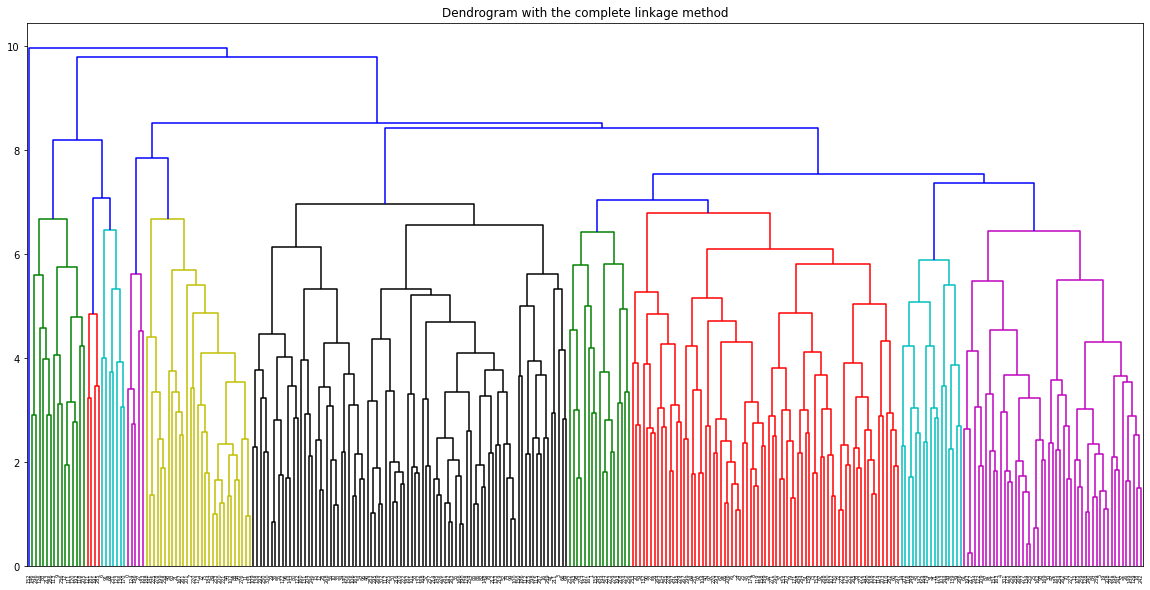

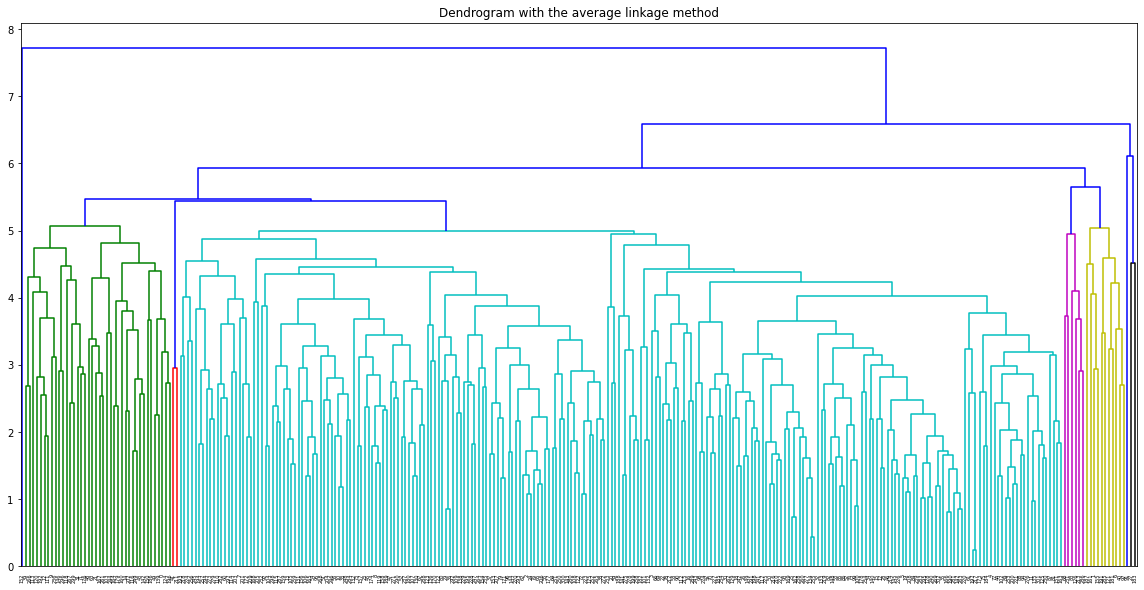

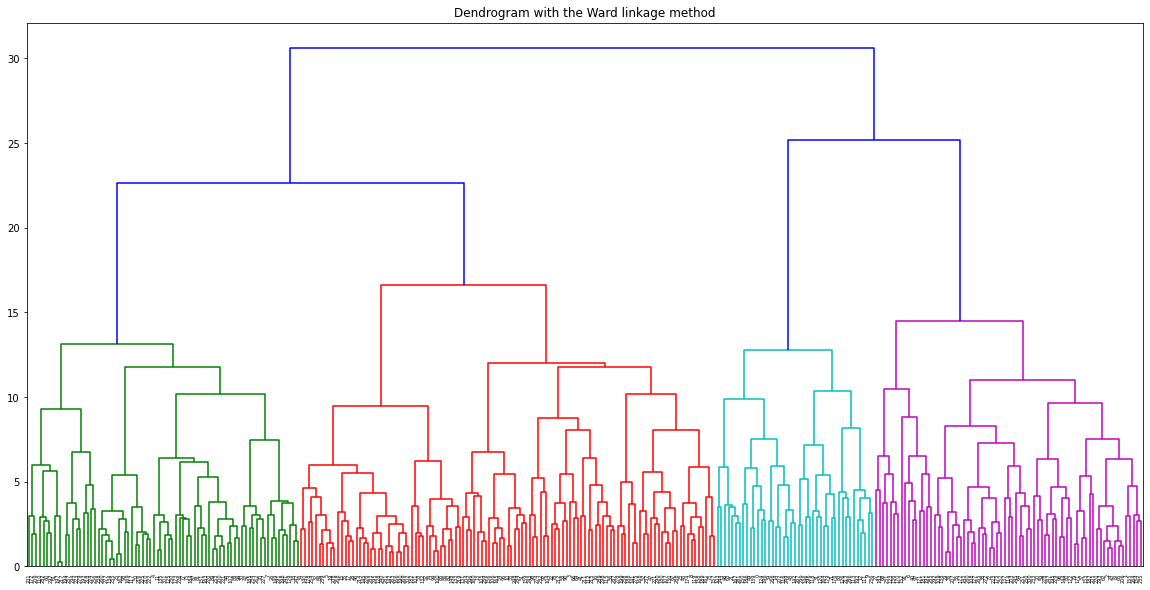

In [7]:
plt.figure(figsize=(20,10))
plt.title("Dendrogram with the complete linkage method")
dendrogram(linkage(X_std, method='complete'))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Dendrogram with the average linkage method")
dendrogram(linkage(X_std, method='average'))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Dendrogram with the Ward linkage method")
dendrogram(linkage(X_std, method='ward'))
plt.show()

Based just on the three dendograms, I would have to choose the Ward linkage method. The first two linkage methods, the complete and average techniques, do not do as good a job clustering. In particular, the two-cluster solution for those linkage methods is problematic because those clusters do not include enough of the true observations.

Apply agglomerative clustering to the heart disease data by setting n_clusters=2. Try the three linkage methods above and get ARI and silhouette scores for each of your solutions. Compare the results with each other and with that of the k-means solution that you implemented in the assignment of the previous checkpoint. Which algorithm and setting does perform better?

In [8]:
# Define the agglomerative clustering with average linkage
agg_cluster = AgglomerativeClustering(linkage="average", 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit the model with 2 clusters, average linkage
clusters = agg_cluster.fit_predict(X_std)

print("Average linkage method ARI score: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Average linkage method silhouette score: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------")

# Define the agglomerative clustering with complete linkage
agg_cluster = AgglomerativeClustering(linkage="complete", 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit the model with 2 clusters and complete linkage method
clusters = agg_cluster.fit_predict(X_std)

print("Complete linkage method ARI score: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Complete linkage method silhouette score: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------")

# Define the agglomerative clustering with ward linkage
agg_cluster = AgglomerativeClustering(linkage="ward", 
                                      affinity='euclidean',
                                      n_clusters=2)

# Fit the model with 2 clusters and ward linkage
clusters = agg_cluster.fit_predict(X_std)

print("Ward linkage method ARI score: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Ward linkage method silhouette score: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Average linkage method ARI score: 0.2940490133353465
Average linkage method silhouette score: 0.14837359969689895
------------------------------------------------
Complete linkage method ARI score: 0.21394030618551016
Complete linkage method silhouette score: 0.11730765444448985
------------------------------------------------
Ward linkage method ARI score: 0.146129913123814
Ward linkage method silhouette score: 0.1387197366557222


The ARI and Silhouette scores indicate that the Average linkage method was the best. The silhouette and ARI scores were highest when the agglomerative clustering model used the average linkage method. However, the k-means 2-cluster solution from the last checkpoint performed better than all three of these. In that previous k-means solution, the silhouette score was .17 and the ARI was .44. 